In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [5]:
df=pd.read_csv("C:\\Users\\abcd\\Downloads\\titanic_dataset.csv")

In [6]:
df
#print(df.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
# Make ‘PassengerId’ as the index column
df=df.set_index("PassengerId")
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
# Check the basic details of the dataset
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
# Fill in all the missing values present in all the columns in the dataset
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
# Set the limit
# Drop columns using that limit
limit = len(df) * 0.7
df=df.dropna(axis=1, thresh=limit)
#View columns in the dataset
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [12]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [13]:
#Replacing the Age column null values with mean,median or mode.
mean=df["Age"].mean()
median=df["Age"].median()
mode=df["Age"].mode()
print(f"Mean = {mean}")
print(f"Median = {median}")
print(f"Mode = {mode}")

Mean = 29.69911764705882
Median = 28.0
Mode = 0    24.0
Name: Age, dtype: float64


In [14]:
#new_df['Age'] = new_df['Age'].replace(np.nan,mean)
df["Age"]=df["Age"].fillna(mean)


C:\Users\abcd\AppData\Local\Temp\ipykernel_22516\3106416914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"]=df["Age"].fillna(mean)


In [15]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [16]:
# Most frequent values in the Embarked column data
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
#Replacing th categorical type with most frequently occuring values in the column.
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].value_counts().index[0])

C:\Users\abcd\AppData\Local\Temp\ipykernel_22516\4047465894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Embarked"]=df["Embarked"].fillna(df["Embarked"].value_counts().index[0])


In [18]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [19]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


In [20]:
# Check and handle outliers in at least 3 columns in the dataset
Finding out outliers in Fare column.


SyntaxError: invalid syntax (2982704718.py, line 2)

C:\Users\abcd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

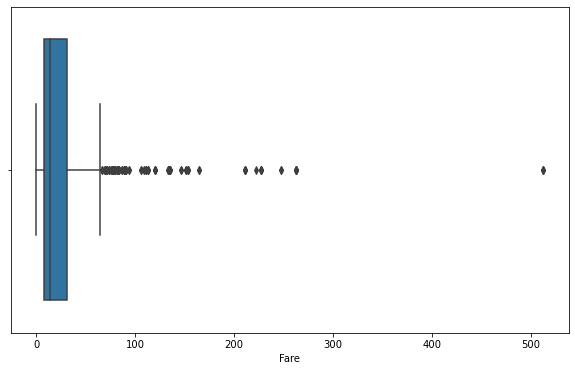

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(df["Fare"],data=df)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

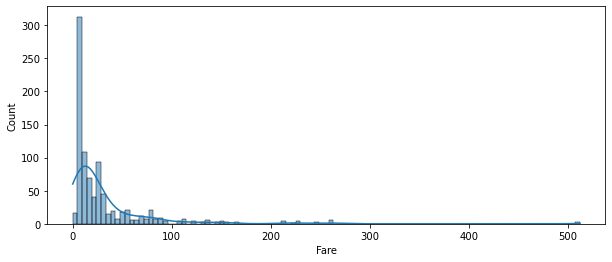

In [22]:
plt.figure(figsize=(10,4))
sns.histplot(df["Fare"],kde=True)

print('skewness value of Fare: ',df['Fare'].skew())

In [24]:
print('skewness value of Fare: ',df['Fare'].skew())

skewness value of Fare:  4.787316519674893


# For a normal distribution skewness value will be between -1 to 1,hence this value is more than 1,the graph shows right skewness.

In [25]:
#Finding outlier using IQR
Q1=np.percentile(df["Fare"],25)
Q3=np.percentile(df["Fare"],75)
IQR=Q3-Q1
print("Interquartile Range",IQR)
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print(f"Upper limit and lower limit are {upper_limit} and {lower_limit}.")

Interquartile Range 23.0896
Upper limit and lower limit are 65.6344 and -26.724.


In [26]:
df['Fare']=np.where(df['Fare']>upper_limit,upper_limit,np.where(df['Fare']<lower_limit,lower_limit,df['Fare']))

C:\Users\abcd\AppData\Local\Temp\ipykernel_22516\2465971117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare']=np.where(df['Fare']>upper_limit,upper_limit,np.where(df['Fare']<lower_limit,lower_limit,df['Fare']))


<AxesSubplot:xlabel='Fare', ylabel='Count'>

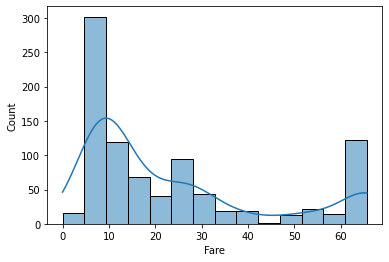

In [27]:
sns.histplot(df["Fare"],kde=True)

In [28]:
#Replacing outliers with median and mode.
df["Fare"].median()

14.4542

# The median value falls within the range of IQR.so replacing outliers with median will also do.

C:\Users\abcd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

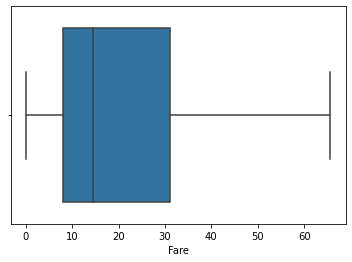

In [29]:
sns.boxplot(df["Fare"])

# 
Finding out Age column outliers.

C:\Users\abcd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

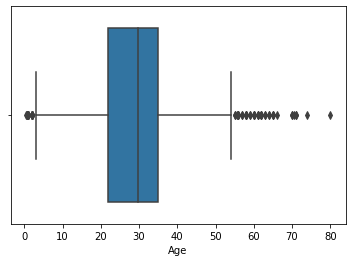

In [30]:
sns.boxplot(df["Age"])

<AxesSubplot:xlabel='Age', ylabel='Count'>

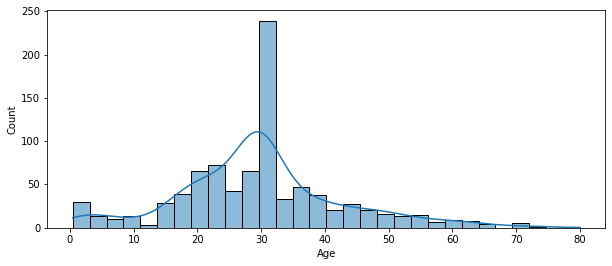

In [31]:
plt.figure(figsize=(10,4))
sns.histplot(df["Age"],kde=True)

In [32]:
print('skewness value of Age: ',df['Age'].skew())

skewness value of Age:  0.4344880940129925


# Since skewness value of age falls within the range of -1 to 1,it contributes to a normal distribution. So there is no need of outlier handling.

# Finding outliers in column Parch and SibSp

In [33]:
print('skewness value of Parch: ',df['Parch'].skew())
print('skewness value of SibSp: ',df['SibSp'].skew())

skewness value of Parch:  2.7491170471010933
skewness value of SibSp:  3.6953517271630565


C:\Users\abcd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abcd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


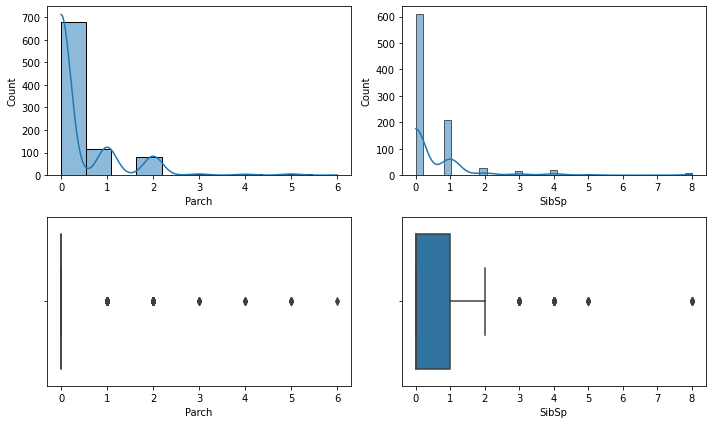

In [34]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.histplot(df["Parch"],kde=True)

plt.subplot(2,2,2)
sns.histplot(df["SibSp"],kde=True)

plt.subplot(2,2,3)
sns.boxplot("Parch",data=df)

plt.subplot(2,2,4)
sns.boxplot("SibSp",data=df)

plt.tight_layout()

# Do min max scaling on the feature set (Take ‘Survived’ as target)


C:\Users\abcd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


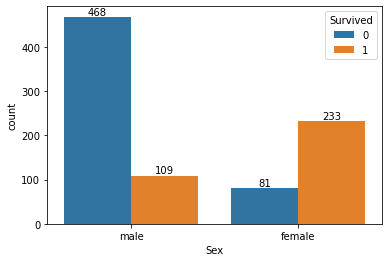

In [35]:
ds=sns.countplot("Sex",hue="Survived",data=df)
for i in ds.containers:
    ds.bar_label(i)

In [36]:
#We can drop columns which are not contributing much to the model.
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)
df

C:\Users\abcd\AppData\Local\Temp\ipykernel_22516\1879772793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Name',axis=1,inplace=True)
C:\Users\abcd\AppData\Local\Temp\ipykernel_22516\1879772793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Ticket',axis=1,inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,S
2,1,1,female,38.000000,1,0,65.6344,C
3,1,3,female,26.000000,0,0,7.9250,S
4,1,1,female,35.000000,1,0,53.1000,S
5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,S
888,1,1,female,19.000000,0,0,30.0000,S
889,0,3,female,29.699118,1,2,23.4500,S


In [37]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,24.046813
std,0.486592,0.836071,13.002015,1.102743,0.806057,20.481625
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,65.634400


In [39]:
# Encoding certian features.
df=pd.get_dummies(df)

In [40]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,65.6344,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [41]:
y=df['Survived']
X=df.drop('Survived',axis=1)

In [42]:
#Training the model with selected features
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [43]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
prediction = model.predict(X_test)

In [44]:
from sklearn.metrics import mean_squared_error as msr
from sklearn.metrics import r2_score
print('MSE= ',msr(y_test,prediction))
print('R2_score= ',r2_score(y_test,prediction))

MSE=  0.13393306503658092
R2_score=  0.4477027880518546


In [45]:
scaled= MinMaxScaler()
X=scaled.fit_transform(X)
X=pd.DataFrame(X)

In [46]:
#Running the model after scaling the data
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
prediction = model.predict(X_test)
print('MSE = ',msr(y_test,prediction))
print('R2_score = ',r2_score(y_test,prediction))

MSE =  0.13393306503658095
R2_score =  0.4477027880518546
